## Waterbody Mapping Charlotte (Static)

<b>NLCD Data Download Link:</b> <a href = "https://www.mrlc.gov/viewer/">  Multi-Resolution Land Characteristics (MRLC) Viewer</a>

<b> Census Block Data Download Link:</b> <a href="https://www.census.gov/cgi-bin/geo/shapefiles/index.php"> Tiger/Line Shapefiles</a>

### Required Packages Loading

In [1]:
import geopandas as gpd
import pandas as pd
from pygris import blocks
import glob
import os
import tifffile
import mapclassify
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar

### Reading and Checking Data

In [2]:
# 2. Load your Charlotte Census Tract Shapefile
tracts = gpd.read_file('chalotte_blocks.gpkg')
df = pd.read_csv('total_wet_area_wide.csv')

In [3]:
print("CRS:", tracts.crs)

CRS: EPSG:4269


In [4]:
tracts = tracts.to_crs(epsg=3857)

In [5]:
tracts.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
Area         float64
geometry    geometry
dtype: object

In [6]:
tracts['GEOID'] = tracts['GEOID'].astype(int)

In [7]:
tracts.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID          int64
Area         float64
geometry    geometry
dtype: object

In [8]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,Area,geometry
0,37,119,005306,37119005306,3.386475e+06,"MULTIPOLYGON (((-8994077.851 4199391.952, -899..."
1,37,119,005307,37119005307,1.145609e+06,"MULTIPOLYGON (((-8993554.649 4201934.565, -899..."
2,37,119,001508,37119001508,5.779201e+06,"MULTIPOLYGON (((-8987926.447 4195417.496, -898..."
3,37,119,005613,37119005613,5.724410e+06,"MULTIPOLYGON (((-8988016.839 4200915.295, -898..."
4,37,119,006214,37119006214,5.561112e+06,"MULTIPOLYGON (((-9008088.745 4216855.997, -900..."


In [9]:
df.head()

,GEOID20,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,37119000101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37119000102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37119000103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37119000104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37119000301,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Preparing Data for Mapping

In [10]:
merged = tracts.merge(df, left_on='GEOID', right_on='GEOID20')

In [11]:
merged.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,Area,geometry,GEOID20,2001,2002,2003,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,37,119,005306,37119005306,3.386475e+06,"MULTIPOLYGON (((-8994077.851 4199391.952, -899...",37119005306,900,900,1800,...,0,1800,1800,1800,1800,0,0,900,1800,900
1,37,119,005307,37119005307,1.145609e+06,"MULTIPOLYGON (((-8993554.649 4201934.565, -899...",37119005307,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,119,001508,37119001508,5.779201e+06,"MULTIPOLYGON (((-8987926.447 4195417.496, -898...",37119001508,88200,85500,87300,...,84600,89100,88200,88200,88200,85500,84600,84600,82800,82800
3,37,119,005613,37119005613,5.724410e+06,"MULTIPOLYGON (((-8988016.839 4200915.295, -898...",37119005613,70200,68400,72000,...,67500,70200,71100,64800,67500,67500,64800,67500,65700,66600
4,37,119,006214,37119006214,5.561112e+06,"MULTIPOLYGON (((-9008088.745 4216855.997, -900...",37119006214,336600,342000,344700,...,349200,350100,351900,349200,350100,339300,338400,338400,338400,338400


In [12]:
merged["Area_PCT_2001"]= (merged['2001']/merged['Area'])*100
merged["Area_PCT_2002"]= (merged['2002']/merged['Area'])*100
merged["Area_PCT_2003"]= (merged['2003']/merged['Area'])*100
merged["Area_PCT_2004"]= (merged['2004']/merged['Area'])*100
merged["Area_PCT_2005"]= (merged['2005']/merged['Area'])*100
merged["Area_PCT_2006"]= (merged['2006']/merged['Area'])*100
merged["Area_PCT_2007"]= (merged['2007']/merged['Area'])*100
merged["Area_PCT_2008"]= (merged['2008']/merged['Area'])*100
merged["Area_PCT_2009"]= (merged['2009']/merged['Area'])*100
merged["Area_PCT_2010"]= (merged['2010']/merged['Area'])*100
merged["Area_PCT_2011"]= (merged['2011']/merged['Area'])*100
merged["Area_PCT_2012"]= (merged['2012']/merged['Area'])*100
merged["Area_PCT_2013"]= (merged['2013']/merged['Area'])*100
merged["Area_PCT_2014"]= (merged['2014']/merged['Area'])*100
merged["Area_PCT_2015"]= (merged['2015']/merged['Area'])*100
merged["Area_PCT_2016"]= (merged['2016']/merged['Area'])*100
merged["Area_PCT_2017"]= (merged['2017']/merged['Area'])*100
merged["Area_PCT_2018"]= (merged['2018']/merged['Area'])*100
merged["Area_PCT_2019"]= (merged['2019']/merged['Area'])*100
merged["Area_PCT_2020"]= (merged['2020']/merged['Area'])*100
merged["Area_PCT_2021"]= (merged['2021']/merged['Area'])*100
merged["Area_PCT_2022"]= (merged['2022']/merged['Area'])*100
merged["Area_PCT_2023"]= (merged['2023']/merged['Area'])*100
merged["Area_PCT_2024"]= (merged['2024']/merged['Area'])*100

In [13]:
merged["Historical_Shift_2001_2024"] = merged["Area_PCT_2001"]-merged["Area_PCT_2024"]
merged["Yearly_Shift_2001_2002"] = merged["Area_PCT_2001"]-merged["Area_PCT_2002"]
merged["Yearly_Shift_2002_2003"] = merged["Area_PCT_2002"]-merged["Area_PCT_2003"]
merged["Yearly_Shift_2003_2004"] = merged["Area_PCT_2003"]-merged["Area_PCT_2004"]
merged["Yearly_Shift_2004_2005"] = merged["Area_PCT_2004"]-merged["Area_PCT_2005"]
merged["Yearly_Shift_2005_2006"] = merged["Area_PCT_2005"]-merged["Area_PCT_2006"]
merged["Yearly_Shift_2006_2007"] = merged["Area_PCT_2006"]-merged["Area_PCT_2007"]
merged["Yearly_Shift_2007_2008"] = merged["Area_PCT_2007"]-merged["Area_PCT_2008"]
merged["Yearly_Shift_2008_2009"] = merged["Area_PCT_2008"]-merged["Area_PCT_2009"]
merged["Yearly_Shift_2009_2010"] = merged["Area_PCT_2009"]-merged["Area_PCT_2010"]
merged["Yearly_Shift_2010_2011"] = merged["Area_PCT_2010"]-merged["Area_PCT_2011"]
merged["Yearly_Shift_2011_2012"] = merged["Area_PCT_2011"]-merged["Area_PCT_2012"]
merged["Yearly_Shift_2012_2013"] = merged["Area_PCT_2012"]-merged["Area_PCT_2013"]
merged["Yearly_Shift_2013_2014"] = merged["Area_PCT_2013"]-merged["Area_PCT_2014"]
merged["Yearly_Shift_2014_2015"] = merged["Area_PCT_2014"]-merged["Area_PCT_2015"]
merged["Yearly_Shift_2015_2016"] = merged["Area_PCT_2015"]-merged["Area_PCT_2016"]
merged["Yearly_Shift_2016_2017"] = merged["Area_PCT_2016"]-merged["Area_PCT_2017"]
merged["Yearly_Shift_2017_2018"] = merged["Area_PCT_2017"]-merged["Area_PCT_2018"]
merged["Yearly_Shift_2018_2019"] = merged["Area_PCT_2018"]-merged["Area_PCT_2019"]
merged["Yearly_Shift_2019_2020"] = merged["Area_PCT_2019"]-merged["Area_PCT_2020"]
merged["Yearly_Shift_2020_2021"] = merged["Area_PCT_2020"]-merged["Area_PCT_2021"]
merged["Yearly_Shift_2021_2022"] = merged["Area_PCT_2021"]-merged["Area_PCT_2022"]
merged["Yearly_Shift_2022_2023"] = merged["Area_PCT_2022"]-merged["Area_PCT_2023"]
merged["Yearly_Shift_2023_2024"] = merged["Area_PCT_2023"]-merged["Area_PCT_2024"]


merged["Five_Years_Shift_2001_2005"] = merged["Area_PCT_2001"]-merged["Area_PCT_2005"]
merged["Five_Years_Shift_2005_2010"] = merged["Area_PCT_2005"]-merged["Area_PCT_2010"]
merged["Five_Years_Shift_2010_2015"] = merged["Area_PCT_2010"]-merged["Area_PCT_2015"]
merged["Five_Years_Shift_2015_2020"] = merged["Area_PCT_2015"]-merged["Area_PCT_2020"]
merged["Five_Years_Shift_2020_2024"] = merged["Area_PCT_2020"]-merged["Area_PCT_2024"]

In [14]:
merged.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,Area,geometry,GEOID20,2001,2002,2003,...,Yearly_Shift_2019_2020,Yearly_Shift_2020_2021,Yearly_Shift_2021_2022,Yearly_Shift_2022_2023,Yearly_Shift_2023_2024,Five_Years_Shift_2001_2005,Five_Years_Shift_2005_2010,Five_Years_Shift_2010_2015,Five_Years_Shift_2015_2020,Five_Years_Shift_2020_2024
0,37,119,005306,37119005306,3.386475e+06,"MULTIPOLYGON (((-8994077.851 4199391.952, -899...",37119005306,900,900,1800,...,0.053153,0.000000,-0.026576,-0.026576,0.026576,0.000000,0.026576,0.000000,0.000000,-0.026576
1,37,119,005307,37119005307,1.145609e+06,"MULTIPOLYGON (((-8993554.649 4201934.565, -899...",37119005307,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,37,119,001508,37119001508,5.779201e+06,"MULTIPOLYGON (((-8987926.447 4195417.496, -898...",37119001508,88200,85500,87300,...,0.046719,0.015573,0.000000,0.031146,0.000000,0.015573,0.109012,-0.062292,-0.015573,0.046719
3,37,119,005613,37119005613,5.724410e+06,"MULTIPOLYGON (((-8988016.839 4200915.295, -898...",37119005613,70200,68400,72000,...,0.000000,0.047166,-0.047166,0.031444,-0.015722,0.015722,0.047166,-0.015722,0.000000,0.015722
4,37,119,006214,37119006214,5.561112e+06,"MULTIPOLYGON (((-9008088.745 4216855.997, -900...",37119006214,336600,342000,344700,...,0.194206,0.016184,0.000000,0.000000,0.000000,-0.129471,-0.032368,-0.064735,0.178022,0.016184


### Demo Run

In [15]:
VAR = "Historical_Shift_2001_2024" # <-- change
merged[VAR] = pd.to_numeric(merged[VAR], errors="coerce")
print("Missing values:", merged[VAR].isna().sum())
print(merged[VAR].describe())

Missing values: 0
count    305.000000
mean       0.096475
std        0.191442
min       -0.497958
25%        0.000000
50%        0.029322
75%        0.137610
max        1.510249
Name: Historical_Shift_2001_2024, dtype: float64


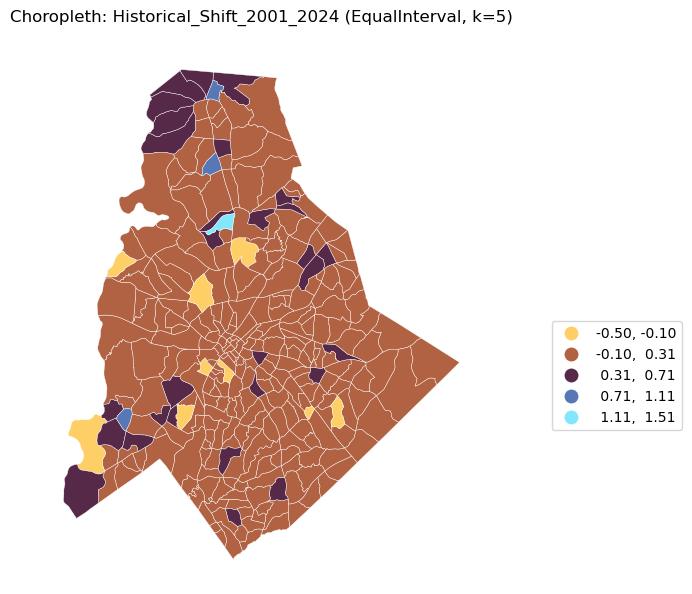

In [16]:
# 1. Replace 'inf' values with NaN so they don't break the classification
# We also handle -inf just in case
merged[VAR] = merged[VAR].replace([np.inf, -np.inf], np.nan)

# 2. Create the plot with 'missing_kwds'
ax = merged.plot(
    column=VAR,
    scheme="EqualInterval", 
    k=5,
    cmap="managua",
    linewidth=0.3,
    edgecolor="white",
    legend=True,
    legend_kwds={"loc": "upper left"},
    figsize=(9, 7),
    # This block handles the NaN / Inf values
    missing_kwds={
        "color": "lightgrey",   # Color for tracts with no data/inf
        "edgecolor": "white",   # Border color
        "label": "New Water / No Previous Water", # Label in legend
        "hatch": "///"          # Optional: adds a pattern to distinguish
    }
)

ax.set_title(f"Choropleth: {VAR} (EqualInterval, k=5)")
ax.set_axis_off()

# Move the legend to a better position if needed
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((1.15, 0.5))

plt.show()

### Historical Mapping (2001-2024)

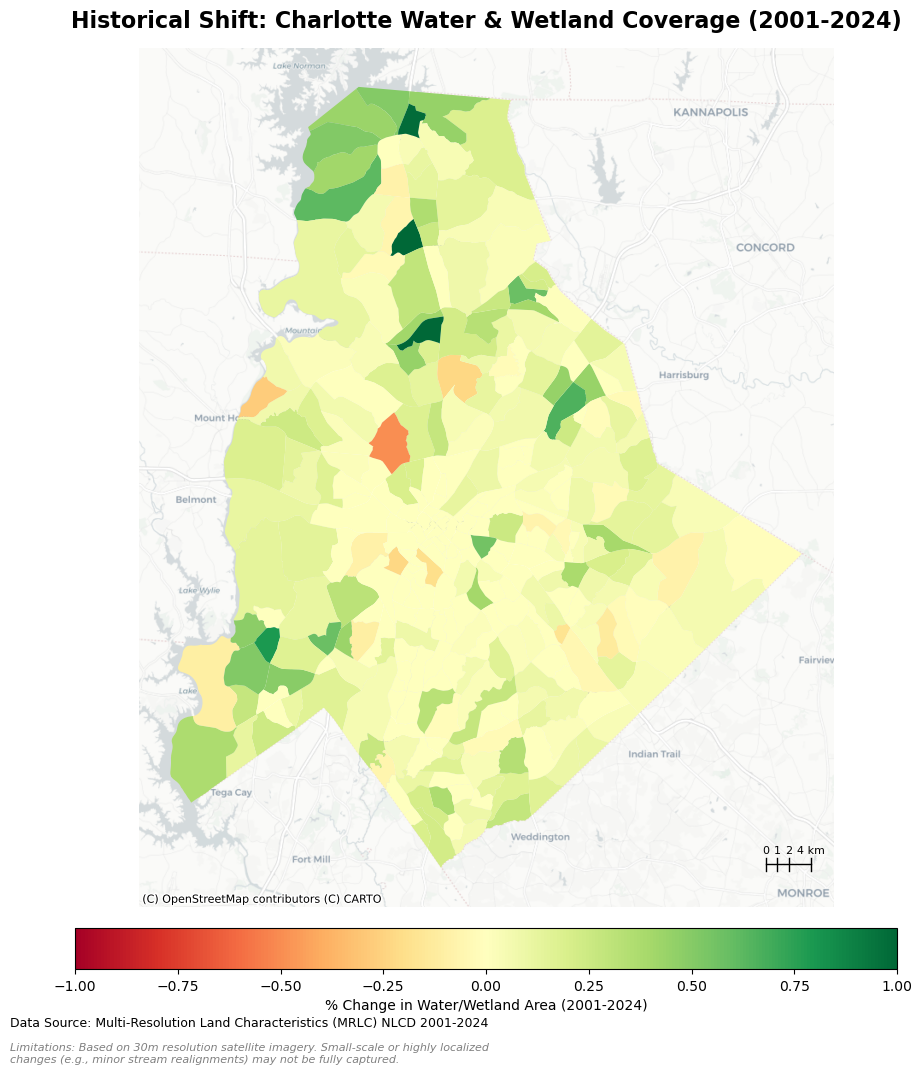

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# 1. Plotting the percentage change
plot = merged.plot(column='Historical_Shift_2001_2024', 
                   cmap='RdYlGn', 
                   ax=ax, 
                   legend=True,
                   vmin=-1, vmax=1, # Focus on significant changes
                   legend_kwds={'label': "% Change in Water/Wetland Area (2001-2024)",
                                'orientation': "horizontal",
                                'pad': 0.02,
                                'shrink': 0.6})

# 2. Add Basemap
# We use CartoDB Positron for a clean, light background that makes colors pop
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Set title and turn off standard axes
ax.set_title("Historical Shift: Charlotte Water & Wetland Coverage (2001-2024)", fontsize=16, fontweight='bold', pad=15)
ax.axis('off')

# 3. Add North Arrow (Top Right)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

scale_length_meters = 5000

# Position it in the bottom right corner
x_start = xmax - 6000  
y_start = ymin + ((ymax - ymin) * 0.05) 
tick_height = (ymax - ymin) * 0.015 

# Draw the main horizontal line (total length = 4000 meters / 4 km)
ax.plot([x_start, x_start + 4000], [y_start, y_start], color='black', linewidth=1)

# Define the sections in kilometers
sections_km = [0, 1, 2, 4]

# Loop through each section to draw a vertical tick and a label
for km in sections_km:
    x_pos = x_start + (km * 1000) # Convert km to meters
    
    # Draw vertical tick mark
    ax.plot([x_pos, x_pos], [y_start - tick_height/2, y_start + tick_height/2], color='black', linewidth=1)
    
    # Label the tick mark (add "km" only to the last label)
    label = f"{km} km" if km == 4 else f"{km}"
    ax.text(x_pos, y_start + tick_height/1.5, label, 
            ha='center', va='bottom', fontsize=8) #fontweight='bold')

# 5. Add Data Source (Bottom Left below the map)
plt.figtext(0.16, 0.14, 
            "Data Source: Multi-Resolution Land Characteristics (MRLC) NLCD 2001-2024", 
            ha="left", fontsize=9, color="black")

# 6. Add Limitations
plt.figtext(0.16, 0.11, 
            "Limitations: Based on 30m resolution satellite imagery. Small-scale or highly localized\n"
            "changes (e.g., minor stream realignments) may not be fully captured.", 
            ha="left", fontsize=8, color="gray", style='italic')


# Adjust spacing between the map and the plot so they don't overlap
plt.tight_layout(rect=[0, 0.08, 1, 1])

# Save and show
plt.savefig('clt_historical_shift_map3.png', dpi=300, bbox_inches='tight')
plt.show()

### Five Years Interval Mapping

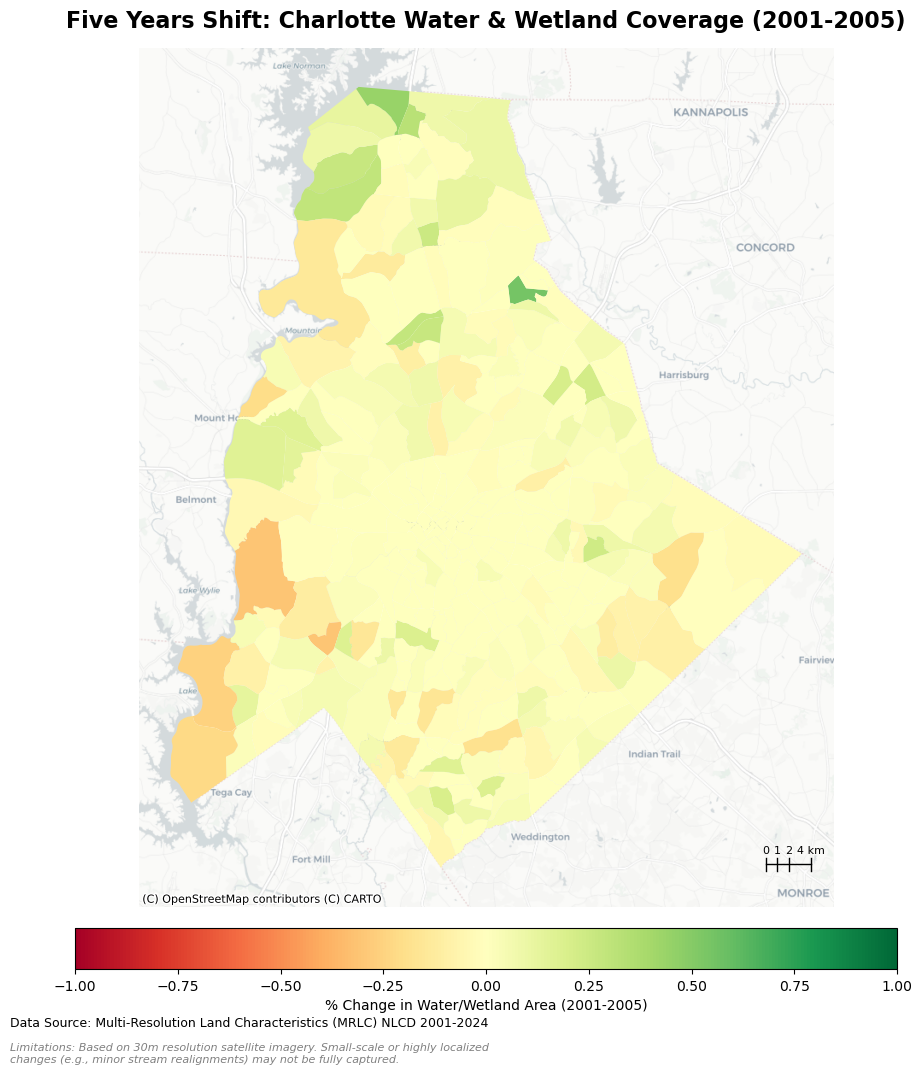

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# 1. Plotting the percentage change
plot = merged.plot(column='Five_Years_Shift_2001_2005', 
                   cmap='RdYlGn', 
                   ax=ax, 
                   legend=True,
                   vmin=-1, vmax=1, # Focus on significant changes
                   legend_kwds={'label': "% Change in Water/Wetland Area (2001-2005)",
                                'orientation': "horizontal",
                                'pad': 0.02,
                                'shrink': 0.6})

# 2. Add Basemap
# We use CartoDB Positron for a clean, light background that makes colors pop
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Set title and turn off standard axes
ax.set_title("Five Years Shift: Charlotte Water & Wetland Coverage (2001-2005)", fontsize=16, fontweight='bold', pad=15)
ax.axis('off')

# 3. Add North Arrow (Top Right)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

scale_length_meters = 5000

# Position it in the bottom right corner
x_start = xmax - 6000  
y_start = ymin + ((ymax - ymin) * 0.05) 
tick_height = (ymax - ymin) * 0.015 

# Draw the main horizontal line (total length = 4000 meters / 4 km)
ax.plot([x_start, x_start + 4000], [y_start, y_start], color='black', linewidth=1)

# Define the sections in kilometers
sections_km = [0, 1, 2, 4]

# Loop through each section to draw a vertical tick and a label
for km in sections_km:
    x_pos = x_start + (km * 1000) # Convert km to meters
    
    # Draw vertical tick mark
    ax.plot([x_pos, x_pos], [y_start - tick_height/2, y_start + tick_height/2], color='black', linewidth=1)
    
    # Label the tick mark (add "km" only to the last label)
    label = f"{km} km" if km == 4 else f"{km}"
    ax.text(x_pos, y_start + tick_height/1.5, label, 
            ha='center', va='bottom', fontsize=8) #fontweight='bold')

# 5. Add Data Source (Bottom Left below the map)
plt.figtext(0.16, 0.14, 
            "Data Source: Multi-Resolution Land Characteristics (MRLC) NLCD 2001-2024", 
            ha="left", fontsize=9, color="black")

# 6. Add Limitations
plt.figtext(0.16, 0.11, 
            "Limitations: Based on 30m resolution satellite imagery. Small-scale or highly localized\n"
            "changes (e.g., minor stream realignments) may not be fully captured.", 
            ha="left", fontsize=8, color="gray", style='italic')


# Adjust spacing between the map and the plot so they don't overlap
plt.tight_layout(rect=[0, 0.08, 1, 1])

# Save and show
plt.savefig('clt_five_years_shift_01_05.png', dpi=300, bbox_inches='tight')
plt.show()

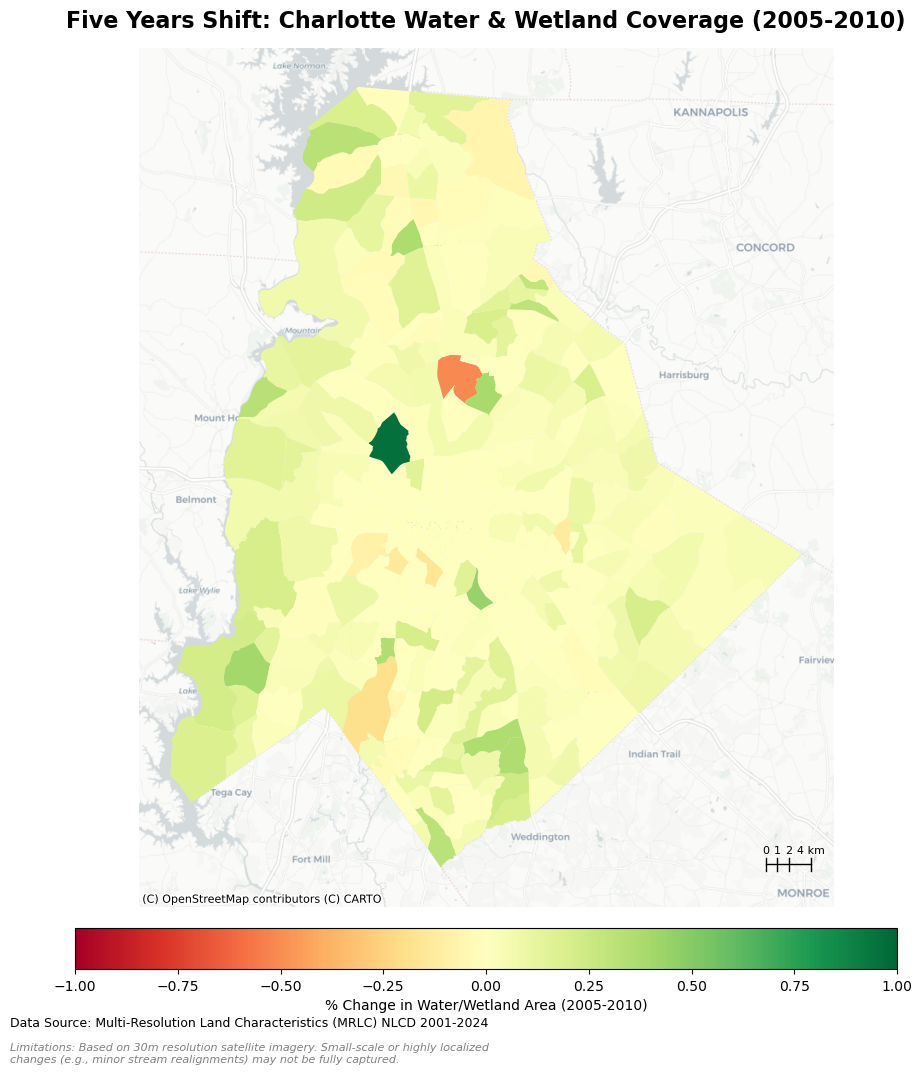

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# 1. Plotting the percentage change
plot = merged.plot(column='Five_Years_Shift_2005_2010', 
                   cmap='RdYlGn', 
                   ax=ax, 
                   legend=True,
                   vmin=-1, vmax=1, # Focus on significant changes
                   legend_kwds={'label': "% Change in Water/Wetland Area (2005-2010)",
                                'orientation': "horizontal",
                                'pad': 0.02,
                                'shrink': 0.6})

# 2. Add Basemap
# We use CartoDB Positron for a clean, light background that makes colors pop
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Set title and turn off standard axes
ax.set_title("Five Years Shift: Charlotte Water & Wetland Coverage (2005-2010)", fontsize=16, fontweight='bold', pad=15)
ax.axis('off')

# 3. Add North Arrow (Top Right)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

scale_length_meters = 5000

# Position it in the bottom right corner
x_start = xmax - 6000  
y_start = ymin + ((ymax - ymin) * 0.05) 
tick_height = (ymax - ymin) * 0.015 

# Draw the main horizontal line (total length = 4000 meters / 4 km)
ax.plot([x_start, x_start + 4000], [y_start, y_start], color='black', linewidth=1)

# Define the sections in kilometers
sections_km = [0, 1, 2, 4]

# Loop through each section to draw a vertical tick and a label
for km in sections_km:
    x_pos = x_start + (km * 1000) # Convert km to meters
    
    # Draw vertical tick mark
    ax.plot([x_pos, x_pos], [y_start - tick_height/2, y_start + tick_height/2], color='black', linewidth=1)
    
    # Label the tick mark (add "km" only to the last label)
    label = f"{km} km" if km == 4 else f"{km}"
    ax.text(x_pos, y_start + tick_height/1.5, label, 
            ha='center', va='bottom', fontsize=8) #fontweight='bold')

# 5. Add Data Source (Bottom Left below the map)
plt.figtext(0.16, 0.14, 
            "Data Source: Multi-Resolution Land Characteristics (MRLC) NLCD 2001-2024", 
            ha="left", fontsize=9, color="black")

# 6. Add Limitations
plt.figtext(0.16, 0.11, 
            "Limitations: Based on 30m resolution satellite imagery. Small-scale or highly localized\n"
            "changes (e.g., minor stream realignments) may not be fully captured.", 
            ha="left", fontsize=8, color="gray", style='italic')


# Adjust spacing between the map and the plot so they don't overlap
plt.tight_layout(rect=[0, 0.08, 1, 1])

# Save and show
plt.savefig('clt_five_years_shift_05_10.png', dpi=300, bbox_inches='tight')
plt.show()

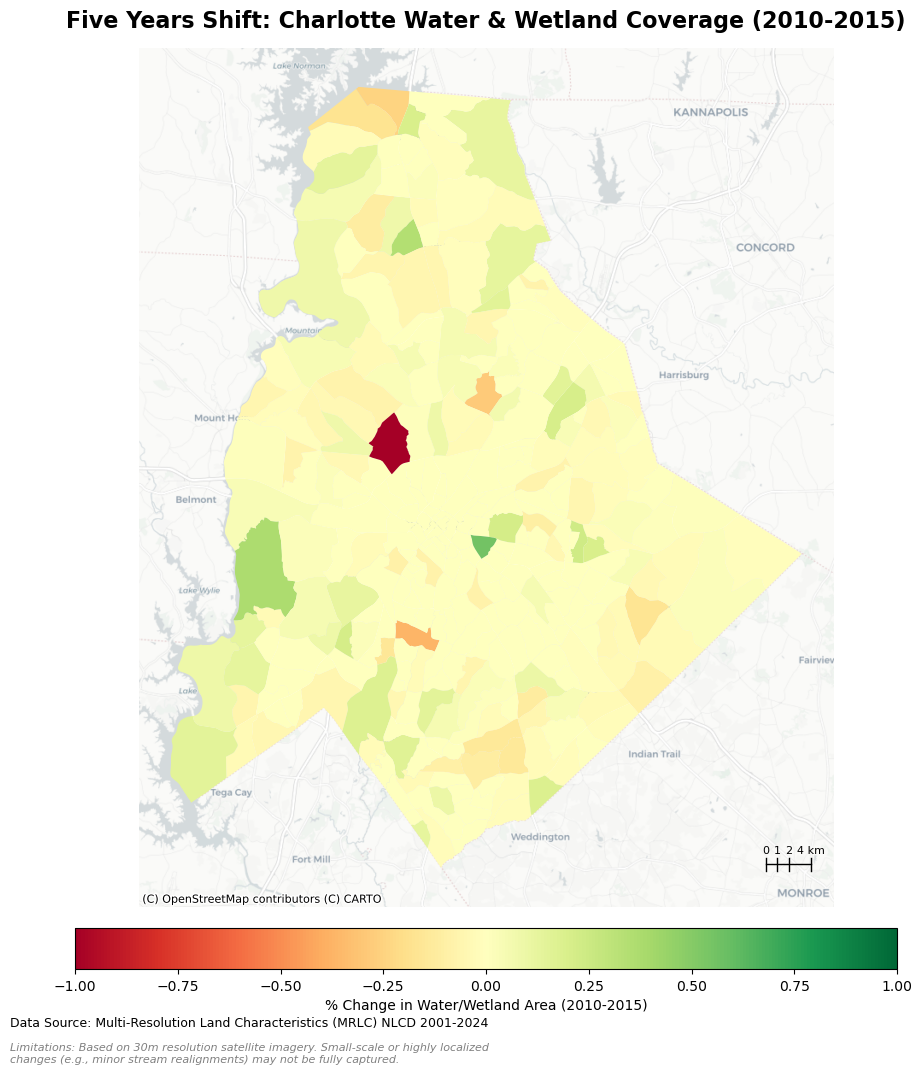

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# 1. Plotting the percentage change
plot = merged.plot(column='Five_Years_Shift_2010_2015', 
                   cmap='RdYlGn', 
                   ax=ax, 
                   legend=True,
                   vmin=-1, vmax=1, # Focus on significant changes
                   legend_kwds={'label': "% Change in Water/Wetland Area (2010-2015)",
                                'orientation': "horizontal",
                                'pad': 0.02,
                                'shrink': 0.6})

# 2. Add Basemap
# We use CartoDB Positron for a clean, light background that makes colors pop
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Set title and turn off standard axes
ax.set_title("Five Years Shift: Charlotte Water & Wetland Coverage (2010-2015)", fontsize=16, fontweight='bold', pad=15)
ax.axis('off')

# 3. Add North Arrow (Top Right)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

scale_length_meters = 5000

# Position it in the bottom right corner
x_start = xmax - 6000  
y_start = ymin + ((ymax - ymin) * 0.05) 
tick_height = (ymax - ymin) * 0.015 

# Draw the main horizontal line (total length = 4000 meters / 4 km)
ax.plot([x_start, x_start + 4000], [y_start, y_start], color='black', linewidth=1)

# Define the sections in kilometers
sections_km = [0, 1, 2, 4]

# Loop through each section to draw a vertical tick and a label
for km in sections_km:
    x_pos = x_start + (km * 1000) # Convert km to meters
    
    # Draw vertical tick mark
    ax.plot([x_pos, x_pos], [y_start - tick_height/2, y_start + tick_height/2], color='black', linewidth=1)
    
    # Label the tick mark (add "km" only to the last label)
    label = f"{km} km" if km == 4 else f"{km}"
    ax.text(x_pos, y_start + tick_height/1.5, label, 
            ha='center', va='bottom', fontsize=8) #fontweight='bold')

# 5. Add Data Source (Bottom Left below the map)
plt.figtext(0.16, 0.14, 
            "Data Source: Multi-Resolution Land Characteristics (MRLC) NLCD 2001-2024", 
            ha="left", fontsize=9, color="black")

# 6. Add Limitations
plt.figtext(0.16, 0.11, 
            "Limitations: Based on 30m resolution satellite imagery. Small-scale or highly localized\n"
            "changes (e.g., minor stream realignments) may not be fully captured.", 
            ha="left", fontsize=8, color="gray", style='italic')


# Adjust spacing between the map and the plot so they don't overlap
plt.tight_layout(rect=[0, 0.08, 1, 1])

# Save and show
plt.savefig('clt_five_years_shift_10_15.png', dpi=300, bbox_inches='tight')
plt.show()

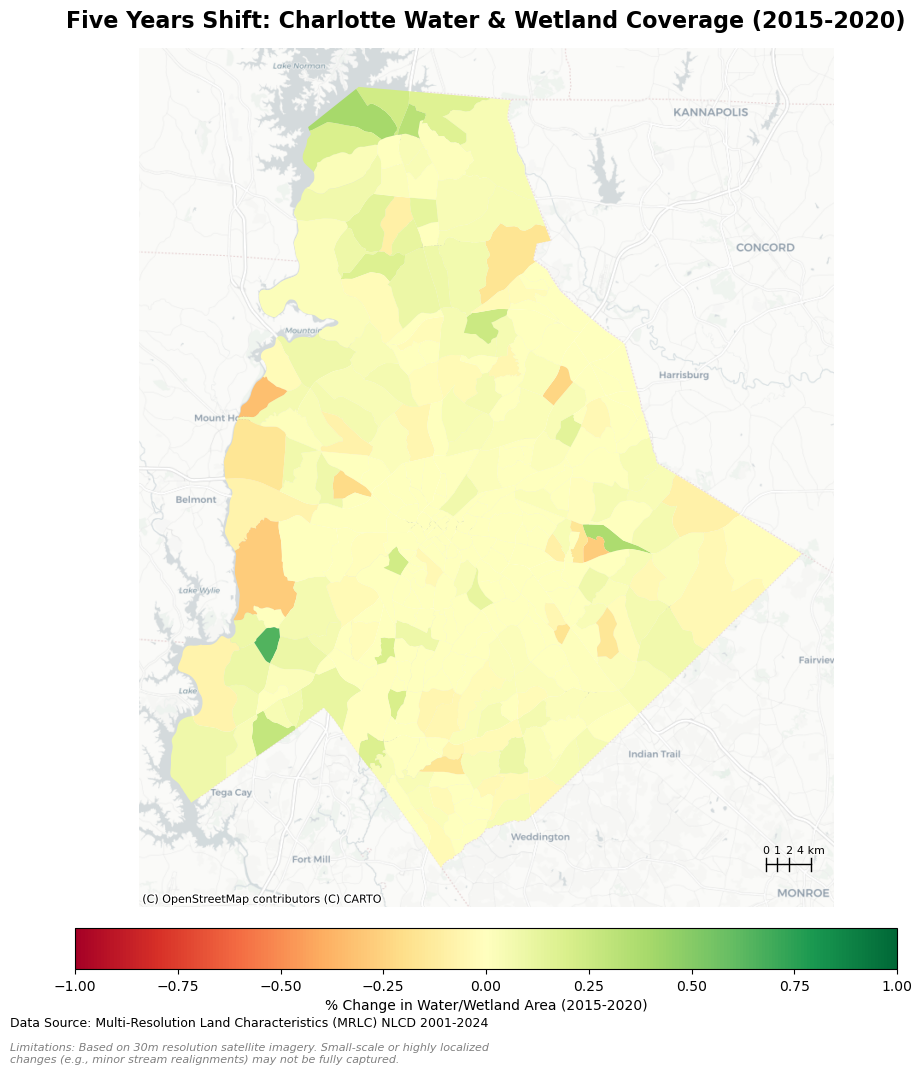

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# 1. Plotting the percentage change
plot = merged.plot(column='Five_Years_Shift_2015_2020', 
                   cmap='RdYlGn', 
                   ax=ax, 
                   legend=True,
                   vmin=-1, vmax=1, # Focus on significant changes
                   legend_kwds={'label': "% Change in Water/Wetland Area (2015-2020)",
                                'orientation': "horizontal",
                                'pad': 0.02,
                                'shrink': 0.6})

# 2. Add Basemap
# We use CartoDB Positron for a clean, light background that makes colors pop
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Set title and turn off standard axes
ax.set_title("Five Years Shift: Charlotte Water & Wetland Coverage (2015-2020)", fontsize=16, fontweight='bold', pad=15)
ax.axis('off')

# 3. Add North Arrow (Top Right)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

scale_length_meters = 5000

# Position it in the bottom right corner
x_start = xmax - 6000  
y_start = ymin + ((ymax - ymin) * 0.05) 
tick_height = (ymax - ymin) * 0.015 

# Draw the main horizontal line (total length = 4000 meters / 4 km)
ax.plot([x_start, x_start + 4000], [y_start, y_start], color='black', linewidth=1)

# Define the sections in kilometers
sections_km = [0, 1, 2, 4]

# Loop through each section to draw a vertical tick and a label
for km in sections_km:
    x_pos = x_start + (km * 1000) # Convert km to meters
    
    # Draw vertical tick mark
    ax.plot([x_pos, x_pos], [y_start - tick_height/2, y_start + tick_height/2], color='black', linewidth=1)
    
    # Label the tick mark (add "km" only to the last label)
    label = f"{km} km" if km == 4 else f"{km}"
    ax.text(x_pos, y_start + tick_height/1.5, label, 
            ha='center', va='bottom', fontsize=8) #fontweight='bold')

# 5. Add Data Source (Bottom Left below the map)
plt.figtext(0.16, 0.14, 
            "Data Source: Multi-Resolution Land Characteristics (MRLC) NLCD 2001-2024", 
            ha="left", fontsize=9, color="black")

# 6. Add Limitations
plt.figtext(0.16, 0.11, 
            "Limitations: Based on 30m resolution satellite imagery. Small-scale or highly localized\n"
            "changes (e.g., minor stream realignments) may not be fully captured.", 
            ha="left", fontsize=8, color="gray", style='italic')


# Adjust spacing between the map and the plot so they don't overlap
plt.tight_layout(rect=[0, 0.08, 1, 1])

# Save and show
plt.savefig('clt_five_years_shift_15_20.png', dpi=300, bbox_inches='tight')
plt.show()

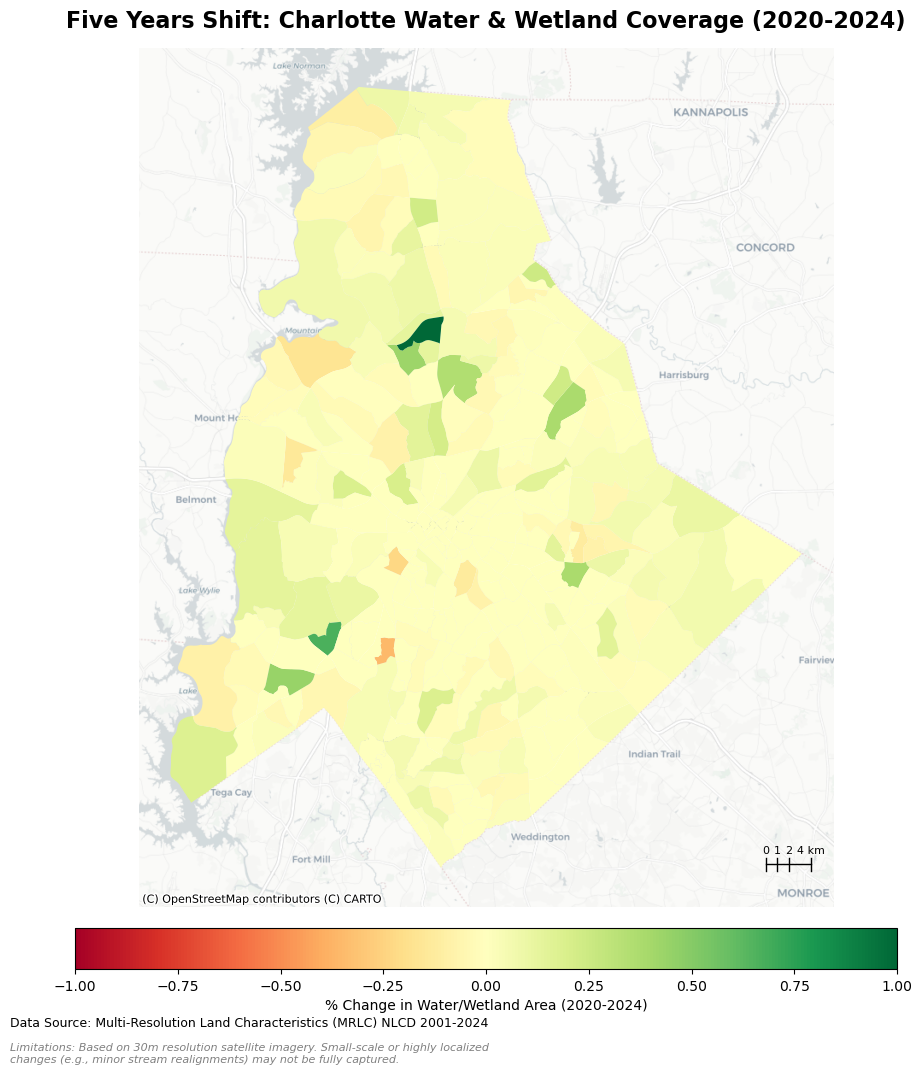

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# 1. Plotting the percentage change
plot = merged.plot(column='Five_Years_Shift_2020_2024', 
                   cmap='RdYlGn', 
                   ax=ax, 
                   legend=True,
                   vmin=-1, vmax=1, # Focus on significant changes
                   legend_kwds={'label': "% Change in Water/Wetland Area (2020-2024)",
                                'orientation': "horizontal",
                                'pad': 0.02,
                                'shrink': 0.6})

# 2. Add Basemap
# We use CartoDB Positron for a clean, light background that makes colors pop
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Set title and turn off standard axes
ax.set_title("Five Years Shift: Charlotte Water & Wetland Coverage (2020-2024)", fontsize=16, fontweight='bold', pad=15)
ax.axis('off')

# 3. Add North Arrow (Top Right)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

scale_length_meters = 5000

# Position it in the bottom right corner
x_start = xmax - 6000  
y_start = ymin + ((ymax - ymin) * 0.05) 
tick_height = (ymax - ymin) * 0.015 

# Draw the main horizontal line (total length = 4000 meters / 4 km)
ax.plot([x_start, x_start + 4000], [y_start, y_start], color='black', linewidth=1)

# Define the sections in kilometers
sections_km = [0, 1, 2, 4]

# Loop through each section to draw a vertical tick and a label
for km in sections_km:
    x_pos = x_start + (km * 1000) # Convert km to meters
    
    # Draw vertical tick mark
    ax.plot([x_pos, x_pos], [y_start - tick_height/2, y_start + tick_height/2], color='black', linewidth=1)
    
    # Label the tick mark (add "km" only to the last label)
    label = f"{km} km" if km == 4 else f"{km}"
    ax.text(x_pos, y_start + tick_height/1.5, label, 
            ha='center', va='bottom', fontsize=8) #fontweight='bold')

# 5. Add Data Source (Bottom Left below the map)
plt.figtext(0.16, 0.14, 
            "Data Source: Multi-Resolution Land Characteristics (MRLC) NLCD 2001-2024", 
            ha="left", fontsize=9, color="black")

# 6. Add Limitations
plt.figtext(0.16, 0.11, 
            "Limitations: Based on 30m resolution satellite imagery. Small-scale or highly localized\n"
            "changes (e.g., minor stream realignments) may not be fully captured.", 
            ha="left", fontsize=8, color="gray", style='italic')


# Adjust spacing between the map and the plot so they don't overlap
plt.tight_layout(rect=[0, 0.08, 1, 1])

# Save and show
plt.savefig('clt_five_years_shift_20_24.png', dpi=300, bbox_inches='tight')
plt.show()